
#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q^3\right) &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 
import matplotlib.pyplot as plt
from pylab import *

In [2]:
q=lambda r,h:np.abs(r)/h

In [3]:
W=lambda x,y: 5.0*(1.0+3.0*x)*(1.0-x**3)/(np.pi*y**2)

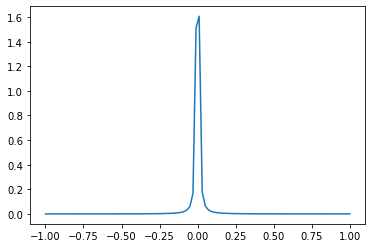

In [4]:
r=np.linspace(-1,1,100)
h=np.linspace(-100,100,100)
qq=q(r,h)
plt.plot(r,W(qq,h))

In [5]:
from sympy import diff,exp,pi
from sympy.abc import q,h,r 
w=5.0*(1.0+3.0*q)*(1.0-q**3)/(pi*h**2)
w1=5.0*(1.0+3.0*(r/h))*(1.0-(r/h)**3)/(pi*h**2)
diff(w,q)

-3*q**2*(15.0*q + 5.0)/(pi*h**2) + 15.0*(1.0 - q**3)/(pi*h**2)

In [6]:
w1=5.0*(1.0+3.0*(r/h))*(1.0-(r/h)**3)/(pi*h**2)
diff(w1,r)

15.0*(1.0 - r**3/h**3)/(pi*h**3) - 3*r**2*(5.0 + 15.0*r/h)/(pi*h**5)

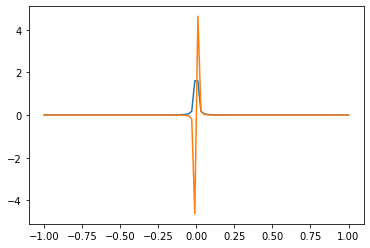

In [7]:
W=lambda r,h:5.0*(1.0+3.0*(r/h))*(1.0-(r/h)**3)/(np.pi*h**2)
dW=lambda r,h:15.0*(1.0 - r**3/h**3)/(np.pi*h**3) - 3*r**2*(5.0 + 15.0*r/h)/(np.pi*h**5)
r=np.linspace(-1,1,100)
h=np.linspace(-100,100,100)
plt.plot(r,W(r,h))
plt.plot(r,dW(r,h))




# 2.0 Integración

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Calcular  una aproximación de las siguientes integrales  con los metodo 1,2

- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizar  que el error sea menor a $\varepsilon=1E-5$.  

In [103]:
import numpy as np
from scipy import interpolate
import scipy.integrate as integrate
class Integrator:
    def __init__(self, a, b, n):
        self.a, self.b, self.n = a, b, n
        self.points, self.weights = self.construct_method()
    def construct_method(self):
        raise NotImplementedError('no rule in class %s' % \
        self.__class__.__name__)
    def integrate(self, f):
        s = 0
        for i in range(len(self.weights)):
            s += self.weights[i]*f(self.points[i])
        return s
    def vectorized_integrate(self, f):
        # f must be vectorized for this to work
        return dot(self.weights, f(self.points))

class Trapezoidal(Integrator):
    def construct_method(self):
        h = (self.b - self.a)/float(self.n - 1)
        x = linspace(self.a, self.b, self.n)
        w = zeros(len(x))
        w[1:-1] += h
        w[0] = h/2; w[-1] = h/2
        return x, w

class Simpson(Integrator):
    def construct_method(self):
        if self.n % 2 != 1: 
            self.n += 1            
        x = np.linspace(self.a, self.b, self.n)
        h = (self.b - self.a)/float(self.n - 1)*2
        w = np.zeros(len(x))
        w[0:self.n:2] = h*1.0/3
        w[1:self.n-1:2] = h*2.0/3
        w[0] /= 2
        w[-1] /= 2
        return x, w

def valor(f,a,b):    
    trapez = Trapezoidal(a,b,100)
    print(f'Por regla del trapezoide nos da : {trapez.integrate(f)}')
    simpson = Simpson(a, b, 100)
    print(f'Por regla de simpson nos da : {simpson.integrate(f)}')
    x=np.linspace(a,b,100)
    print(integrate.trapz(f(x),x),integrate.simps(f(x),x))

 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$
 
 #### Regla del trapecio:
 
  $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx = \frac {h*[(e^{1-\sqrt{0}}+e^{1-\sqrt{\pi}})]}{2} - (h^3)*f''(ξ)/12
 $$
 Con: $ ξ \in [0,\pi] $ y $h=\pi - 0$
 
 #### Regla de Simpson: 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx = \frac {h*[(e^{1-\sqrt{0}}+e^{1-\sqrt{\pi/2}}+e^{1-\sqrt{\pi}})]}{3} - \frac{(h^5)*f^{(4)}(ξ)}{90}
 $$
 Con: $ ξ \in [0,\pi] $ y $h=\pi - 0$

In [104]:
f=lambda x:np.exp(1-np.sqrt(x))
valor(f,0,np.pi)

Por regla del trapezoide nos da : 2.878562638709149
Por regla de simpson nos da : 2.876718855741281
2.8785626387091496 2.877400706092263


 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$
 #### Regla del trapecio:
 
  $$
  \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx = \frac {h*[(\frac{1}{\sqrt{\tan 0}}+\frac{1}{\sqrt{\tan \pi}})]}{2} - (h^3)*f''(ξ)/12
 $$
 Con: $ ξ \in [0,\pi/2] $ y $h=\pi/2 - 0$
 
 #### Regla de Simpson: 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx = \frac {h*[(\frac{1}{\sqrt{\tan 0}}+\frac{1}{\sqrt{\tan \pi/2}}+ \frac{1}{\sqrt{\tan \pi}} )]}{3} - \frac{(h^5)*f^{(4)}(ξ)}{90}
 $$
 Con: $ ξ \in [0,\pi/2] $ y $h=\pi/2 - 0$

In [105]:
f=lambda x:1/np.sqrt(np.tan(x))
a=1E-10
b=np.pi/2
valor(f,a,b)

Por regla del trapezoide nos da : 795.3685538918761
Por regla de simpson nos da : 525.6622997693736
795.3685538918763 663.157303888207


$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

 #### Regla del trapecio:
 
  $$
  \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx = \frac {h*[(\frac{1}{1+(-\infty)^2} +\frac{1}{1+(\infty)^2})]}{2} - (h^3)*f''(ξ)/12
 $$
 Con: $ ξ \in [-\infty,\infty] $ y $h=\infty - (-\infty)$
 
 #### Regla de Simpson: 
 $$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx = \frac {h*[(\frac{1}{1+(-\infty)^2}+1 +\frac{1}{1+(\infty)^2})]}{3} - \frac{(h^5)*f^{(4)}(ξ)}{90}
 $$
 Con: $ ξ \in [-\infty,\infty] $ y $h=\infty - (-\infty)$

In [106]:
f=lambda x:1/(1+x**2)
a=np.NINF
b=np.inf
integrate.quad(lambda x: 1/(1+x**2),np.NINF,b)[0]

3.141592653589793

$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
$$
 #### Regla del trapecio:
 
  $$
  \int_{e}^{2e} \frac{1}{\ln x} \, dx = \frac {h*[(\frac{1}{\ln e} +\frac{1}{\ln 2e})]}{2} - (h^3)*f''(ξ)/12
 $$
 Con: $ ξ \in [-\infty,\infty] $ y $h=\infty - (-\infty)$
 
 #### Regla de Simpson: 
 $$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx = \frac {h*[(\frac{1}{\ln e} +\frac{1}{\ln 1.5*e}+\frac{1}{\ln 2*e})]}{3} - \frac{(h^5)*f^{(4)}(ξ)}{90}
 $$
 Con: $ ξ \in [-\infty,\infty] $ y $h=\infty - (-\infty)$

In [107]:
f=lambda x:1/np.log(x)
valor(f,np.exp(1),2*np.exp(1))

Por regla del trapezoide nos da : 2.003829642271284
Por regla de simpson nos da : 2.003810563686715
2.003829642271284 2.003810928192265


4. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

In [102]:
R=6378140
g=9.8
z=lambda x:(x/R)**(-2)
v=np.sqrt(2*g*R*integrate.quad(z,1,np.inf)[0])
print(f'La velocidad de escape es {v} m/s')

La velocidad de escape es 71313065774.11224 m/s



6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large